In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [2]:
multiple = pd.read_csv('results_multiple.csv')
multiple

,Unnamed: 0,model,trainc1,trainc2,trainc3,trainc4,trainc5,trainc6,trainc7,trainc8,testc1,testc2,testc3,testc4,testc5,testc6,testc7,testc8
0,0,unetfpn,0.613715,0.716680,0.772666,0.739262,0.555154,0.536602,0.609969,0.572866,0.500849,0.768117,0.669278,0.687476,0.467498,0.412280,0.495491,0.527771
1,1,unetfpnsum,0.586274,0.700842,0.762419,0.743512,0.565287,0.501125,0.265060,0.564888,0.481870,0.759707,0.658747,0.696755,0.475892,0.350031,0.221503,0.537790
2,2,unetfpnconcat,0.597174,0.793900,0.720889,0.723303,0.537022,0.743719,0.524205,0.524649,0.445360,0.748130,0.606961,0.669890,0.421214,0.715044,0.448237,0.533935
3,3,fcnfpn,0.006970,0.607533,0.690099,0.565648,0.606481,0.397028,0.423944,0.270645,0.002984,0.688235,0.609085,0.529553,0.496193,0.291346,0.349365,0.192907


In [3]:
def print_iou(dataframe):
  # train and test
  print(dataframe[dataframe.columns[0: 8]].T.mean().values, dataframe[dataframe.columns[8: 16]].T.mean().values)

In [4]:
multiple.melt(id_vars='model')

,model,variable,value
0,unetfpn,Unnamed: 0,0.000000
1,unetfpnsum,Unnamed: 0,1.000000
2,unetfpnconcat,Unnamed: 0,2.000000
3,fcnfpn,Unnamed: 0,3.000000
4,unetfpn,trainc1,0.613715
...,...,...,...
63,fcnfpn,testc7,0.349365
64,unetfpn,testc8,0.527771
65,unetfpnsum,testc8,0.537790
66,unetfpnconcat,testc8,0.533935


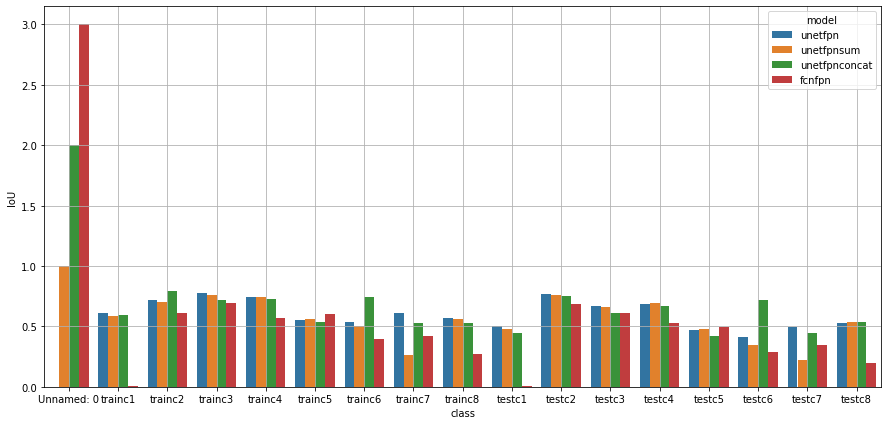

In [5]:
fg, ax = plt.subplots(figsize=(15, 7))
sb.barplot(data=multiple.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()

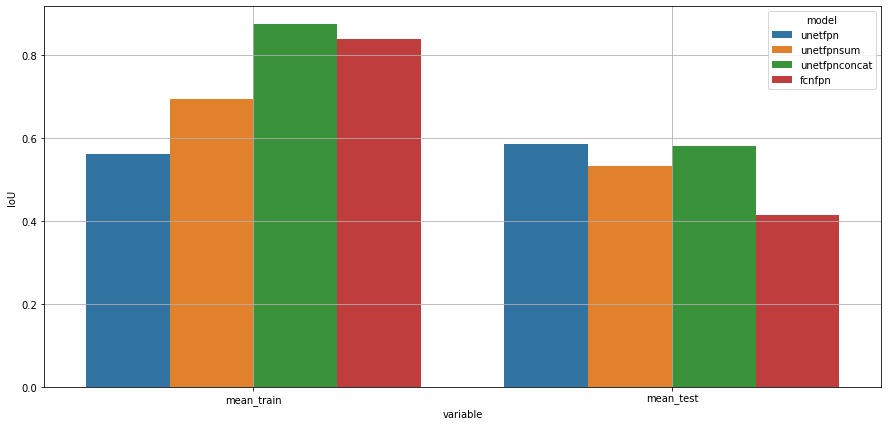

In [6]:
mean_results = multiple.copy()
mean_results['mean_train'] = multiple.iloc[:,0:8].mean(axis=1)
mean_results['mean_test'] = multiple.iloc[:,8:16].mean(axis=1)
mean_results = mean_results[['mean_train', 'mean_test', 'model']]

fg, ax = plt.subplots(figsize=(15, 7))
sb.barplot(data=mean_results.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
# ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()